In [1]:
import numpy as np
import pandas as pd 

#Read in data, requires 'ISO-8859-1' encoding due to utf-8 encoding error
nhs = pd.read_csv("datasets/competition_starter.csv",)
nhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9293 entries, 0 to 9292
Columns: 118 entries, Unnamed: 0 to gp_cost_per_registered_patient
dtypes: float64(98), int64(7), object(13)
memory usage: 8.4+ MB


In [2]:
#Description summary for NHS data, remove unnamed 0 as they are empty.
nhs = nhs.drop('Unnamed: 0', axis = 1)
nhs.describe()

,gp_practice,gp_year,gp_month,quality,eastings,northings,longitude,latitude,multiple_dep_measure_rank,income_score,...,lt_mobility_dexterity_diff_pct,lt_learning_diff_pct,ltn_emotional_mental_health_condition_pct,lt_long_term_pain_discomfort_pct,lt_shortness_of_breath_diffbreathing_pct,lt_confusion_memory_loss_pct,lt_chronic_illness_pct,lt_other_condition_pct,lt_no_condition_pct,gp_cost_per_registered_patient
count,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,8192.000000,8192.000000,...,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,9293.000000
mean,900561.243086,2015.241364,6.075541,1.052943,305455.642742,374414.086732,-6.369229,54.605579,378.299927,0.289740,...,12.799712,2.413645,6.495131,10.981111,9.452776,2.365344,7.036102,5.425986,66.451626,16.681633
std,190.144179,1.005453,3.467874,0.457156,37133.914673,27412.608612,0.573195,0.247243,233.611636,0.156393,...,3.750709,0.729046,2.628782,2.894589,2.576569,1.324764,1.510318,1.089391,5.866099,2.915837
min,900207.000000,2014.000000,1.000000,1.000000,194098.000000,314364.000000,-8.091818,54.061986,5.000000,0.050000,...,3.880000,0.970000,2.590000,4.110000,5.110000,0.560000,2.470000,2.990000,51.860000,1.713366
25%,900413.000000,2014.000000,3.000000,1.000000,284723.000000,358174.000000,-6.690149,54.460624,194.000000,0.180000,...,9.930000,1.877500,4.620000,9.000000,7.750000,1.507500,5.960000,4.740000,62.280000,14.839216
50%,900574.000000,2015.000000,6.000000,1.000000,314950.000000,373887.000000,-6.221608,54.595323,348.000000,0.270000,...,11.650000,2.350000,5.760000,10.550000,8.760000,1.960000,6.890000,5.260000,68.040000,16.610665
75%,900720.000000,2016.000000,9.000000,1.000000,335371.000000,390435.000000,-5.906142,54.751666,581.000000,0.340000,...,15.200000,2.850000,7.830000,12.520000,10.880000,2.790000,8.110000,5.910000,70.792500,18.392786
max,900870.000000,2017.000000,12.000000,5.000000,362801.000000,440595.000000,-5.484965,55.203020,865.000000,0.740000,...,24.480000,4.370000,13.590000,19.580000,17.570000,6.650000,10.810000,9.420000,81.800000,37.371200


In [3]:
#Define numeric values and categorical values

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_values = list(nhs.select_dtypes(include=numerics))

categoric_values = list(nhs)
for value in numeric_values:
    categoric_values.remove(value)

In [4]:
#Build Feature Pipeline which performs several functions,
#
#   -Selects the approapriate dataframe according to whether its categorical or numeric
#
#   -Tries to fill missing numeric data using the median
#
#   -One Hot Encodes the categorical value for each categorical column
#
#   -Standard Scales the numerical data
#

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, Imputer, LabelBinarizer
from utils.DataFrameSelector import DataFrameSelector
from utils.CatEncoder import CatEncoder

nhs[categoric_values] = nhs[categoric_values].replace('-', np.nan)
nhs[categoric_values] = nhs[categoric_values].replace('', np.nan)
nhs = nhs.dropna(subset = categoric_values)

numeric_pipe = Pipeline([('select', DataFrameSelector(numeric_values)),
                         ('impute', Imputer(strategy = "median")),
                         ('std', StandardScaler()),])

categoric_pipe = Pipeline([('select', DataFrameSelector(categoric_values)),
                           ('encoder', CatEncoder()),])

feature_pipe = FeatureUnion(transformer_list = [('num_pipe', numeric_pipe), ('cat_pipe', categoric_pipe)])

In [5]:
#Only processing numerical values since the categorical pipeline is untested
processed_nhs = numeric_pipe.fit_transform(nhs)


In [6]:
#Plot correlation matrix of numeric values, left out because it takes too long
'''
import matplotlib.pyplot as plt 
from pandas.tools.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(processed_nhs), figsize = (20, 12))
plt.show()
'''

'\nimport matplotlib.pyplot as plt \nfrom pandas.tools.plotting import scatter_matrix\n\nscatter_matrix(pd.DataFrame(processed_nhs), figsize = (20, 12))\nplt.show()\n'

In [7]:
#Also print the indexing for each variable to make the graph easier to read
for num in range(processed_nhs.shape[1]):
    print(num, " - ", numeric_values[num])

0  -  gp_practice
1  -  gp_year
2  -  gp_month
3  -  quality
4  -  eastings
5  -  northings
6  -  longitude
7  -  latitude
8  -  multiple_dep_measure_rank
9  -  income_score
10  -  income_rank
11  -  empl_score_18-59_64_yrs
12  -  empl_rank_18-59_64_yrs
13  -  health_dep_disability_rank
14  -  education_skills_train_rank
15  -  proximity_to_services_rank
16  -  living_env_rank
17  -  crime_disorder_rank
18  -  income_dep_children_score
19  -  income_dep_children_rank
20  -  income_dep_older_people_score
21  -  income_dep_older_people_rank
22  -  edu_skill_train_primary_sub_rank
23  -  edu_skill_train_post-primary_sub_rank
24  -  edu_skill_train_work_age_adult_sub_rank
25  -  living_env_housing_quality_sub_rank
26  -  living_env_housing_access_sub_rank
27  -  living_env_outdoor_phys_env_sub_rank
28  -  crime_disorder_crime_sub_rank
29  -  crime_disorder_disorder_sub_rank
30  -  population_estimate_nimdm_2010
31  -  all_residents
32  -  age_0_4_years
33  -  age_5_9_years
34  -  age_10_14

In [8]:
#Print out of the correlations with respect to the Actual Cost
corr_matrix = pd.DataFrame(processed_nhs).corr()
print("Correlations:")
for num in range(processed_nhs.shape[1]):
    print(numeric_values[num], " - ", corr_matrix.iloc[:,103][num])

Correlations:
gp_practice  -  -0.298673769255
gp_year  -  0.105063186645
gp_month  -  0.0539642502398
quality  -  nan
eastings  -  0.243048995783
northings  -  0.180290066875
longitude  -  0.246157238419
latitude  -  0.171585776139
multiple_dep_measure_rank  -  -0.138440021624
income_score  -  0.169684543611
income_rank  -  -0.123610890933
empl_score_18-59_64_yrs  -  0.18244838123
empl_rank_18-59_64_yrs  -  -0.1357111947
health_dep_disability_rank  -  -0.129837095474
education_skills_train_rank  -  -0.186046966026
proximity_to_services_rank  -  0.311154592408
living_env_rank  -  -0.262225689819
crime_disorder_rank  -  -0.291361455244
income_dep_children_score  -  0.191098835703
income_dep_children_rank  -  -0.15149068811
income_dep_older_people_score  -  0.0254886797547
income_dep_older_people_rank  -  0.0115072783488
edu_skill_train_primary_sub_rank  -  -0.218027330176
edu_skill_train_post-primary_sub_rank  -  -0.229545568211
edu_skill_train_work_age_adult_sub_rank  -  -0.063058413277

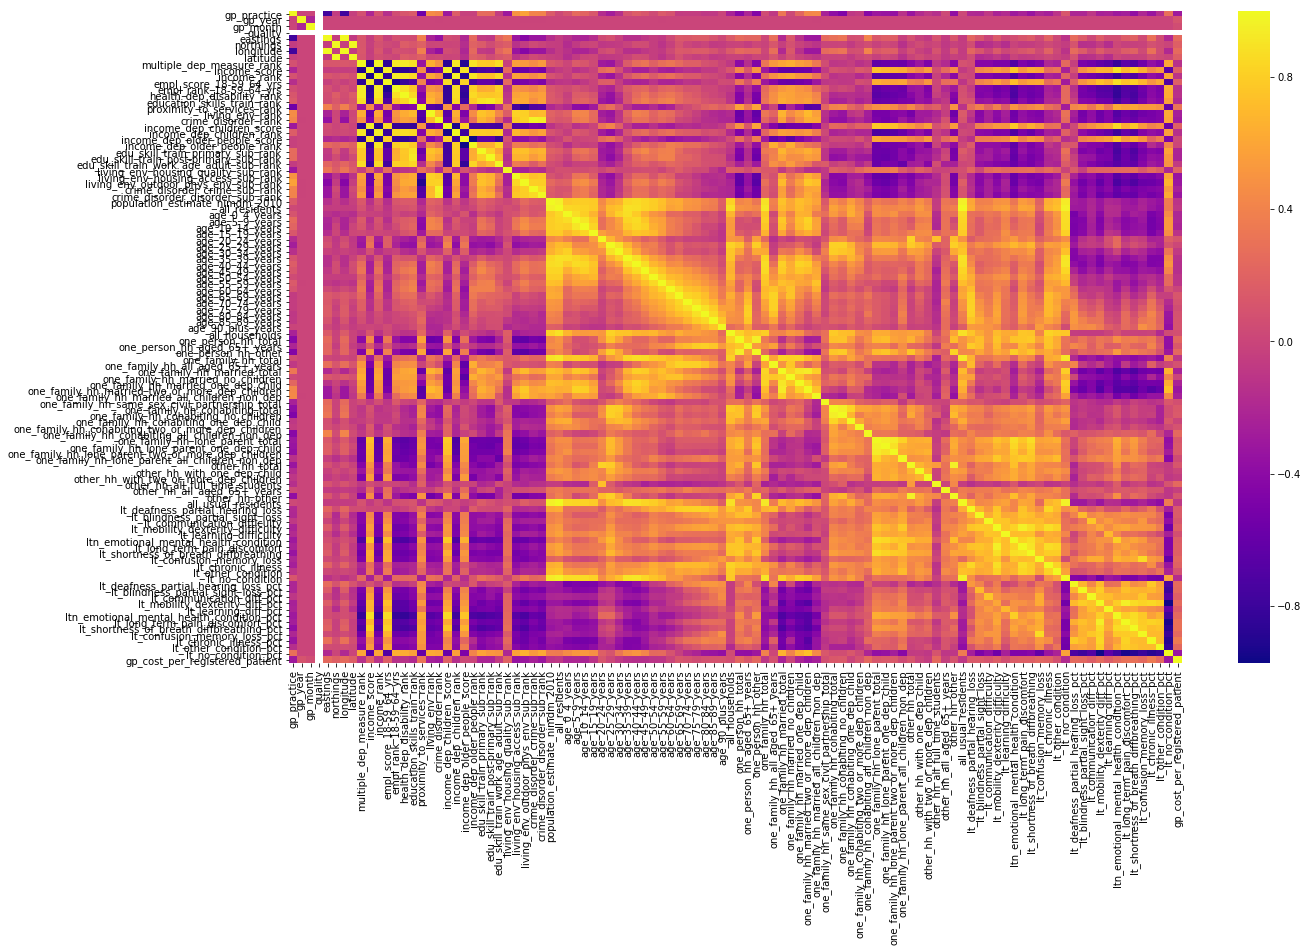

In [10]:
#Seaborn heatmap of correlation for more transparency
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, 
            xticklabels=numeric_values,
            yticklabels=numeric_values,
            cmap="plasma")
plt.show()